In [1]:
import numpy as np
from cube2x2 import Cube
from visualize import visualize_cube

In [2]:
cube = Cube()

In [3]:
Q = np.loadtxt('Q_init.txt')

In [4]:
# make values smaller and 0s to lower value so max doesn't return them
Q *= 0.1

In [5]:
Q = np.where(Q == 0., -300, Q)

## SARSA(0)

Undiscounted

In [6]:
def sarsa0(Q, n_episodes, n_states, n_actions, alpha, epsilon):
    
    n_stepstogoal = []
    reward = -1 # constant reward for each time step
    
    for ep in range(n_episodes):
        
        steps = 0
        # starting state
        cube.shuffle_state()
        
        # choose action epsilon-greedily
        A = np.random.randint(n_actions) if np.random.rand() < epsilon else np.argmax(Q[cube.current_s,:])
        
        # for each step in the episode
        while True:
            
            steps += 1
            prev_S = cube.current_s
            # take action
            cube.step(A)
            
            A_n = np.random.randint(n_actions) if np.random.rand() < epsilon else np.argmax(Q[cube.current_s,:])
            
            # update Q values
            update = reward + Q[cube.current_s,A_n] - Q[prev_S, A]
            Q[prev_S, A] = Q[prev_S, A] + alpha * update
            
            A = A_n
            
            if cube.current_s == cube.terminal_s:
                break
                
        print('Episode {} done'.format(ep+1))
        n_stepstogoal.append(steps)
    
    return Q, n_stepstogoal

In [7]:
n_states = len(cube.valid_states)
n_actions = 6

In [8]:
Q, steps_togoal = sarsa0(Q, 25, n_states, n_actions, 0.5, 0.1)

Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
Episode 10 done
Episode 11 done
Episode 12 done
Episode 13 done
Episode 14 done
Episode 15 done
Episode 16 done
Episode 17 done
Episode 18 done
Episode 19 done
Episode 20 done
Episode 21 done
Episode 22 done
Episode 23 done
Episode 24 done
Episode 25 done


In [9]:
np.savetxt('sarsa0_Q.txt', Q)
np.savetxt('steps_sarsa.txt', np.array(steps_togoal))

In [2]:
cube1 = Cube()
cube1.shuffle_state()

In [3]:
cube1.current_s = np.where(cube1.valid_states == 'WRWRGGRYBBWOGGRYBBWOYOYO')[0][0]

In [4]:
cube1.current_s

1528

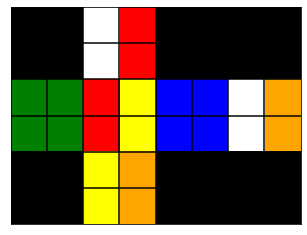

In [7]:
visualize_cube(cube1.valid_states[cube1.current_s])

In [8]:
cube1.step(5)

WRWRGGRYBBWOGGRYBBWOYOYO


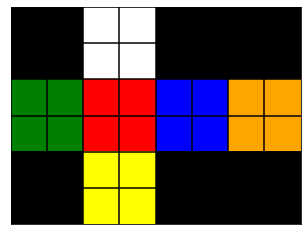

In [10]:
visualize_cube(cube1.valid_states[cube1.current_s])